In [16]:
import plotly

In [17]:
plotly.__version__

'2.6.0'

In [18]:
import plotly.plotly as py

In [19]:
from plotly.graph_objs import *

In [20]:
import numpy as np           
from scipy.io import netcdf 

In [21]:
from mpl_toolkits.basemap import Basemap

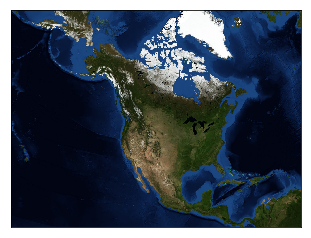

In [22]:
import matplotlib.pyplot as plt
# System.loadLibrary("mkl_rt")
m = Basemap(width=12000000, height=9000000, projection='lcc',
            resolution=None, lat_1=45., lat_2=55, lat_0=50, lon_0=-107.)
m.bluemarble()
plt.show()


In [23]:
f_path = './test.nc'#your file from the NCEP reanalysis plotter

# Retrieve data from NetCDF file
with netcdf.netcdf_file(f_path, 'r') as f:
    lon = f.variables['lon'][::]    # longitude 经度
    lat = f.variables['lat'][::-1]  # latitude 纬度 invert the latitude vector -> South to North
    print f.variables.keys()
    air = f.variables['air'][0,::-1,:]  # squeeze out the time dimension, 
                                        # invert latitude index

['lat', 'lon', 'time', 'air']


In [24]:
print air
print lon
print lat

[[ 0.90628588  0.90628588  0.90628588 ...,  0.90628588  0.90628588
   0.90628588]
 [ 0.90579122  0.95775968  1.00520587 ...,  0.7439307   0.80188382
   0.85552585]
 [ 0.58268267  0.70676959  0.8273443  ...,  0.18869288  0.32142442
   0.45205811]
 ..., 
 [ 6.41885138  6.56349897  6.67353249 ...,  5.82996273  6.03996658
   6.24112892]
 [ 5.45093441  5.35339451  5.24630117 ...,  5.71639919  5.63305044
   5.54273844]
 [ 4.47460938  4.47460938  4.47460938 ...,  4.47460938  4.47460938
   4.47460938]]
[   0.     2.5    5.     7.5   10.    12.5   15.    17.5   20.    22.5
   25.    27.5   30.    32.5   35.    37.5   40.    42.5   45.    47.5
   50.    52.5   55.    57.5   60.    62.5   65.    67.5   70.    72.5
   75.    77.5   80.    82.5   85.    87.5   90.    92.5   95.    97.5
  100.   102.5  105.   107.5  110.   112.5  115.   117.5  120.   122.5
  125.   127.5  130.   132.5  135.   137.5  140.   142.5  145.   147.5
  150.   152.5  155.   157.5  160.   162.5  165.   167.5  170.   172.5
  1

In [25]:
# Shift 'lon' from [0,360] to [-180,180], make numpy array
tmp_lon = np.array([lon[n]-360 if l>=180 else lon[n] 
                   for n,l in enumerate(lon)])  # => [0,180]U[-180,2.5]
i_east, = np.where(tmp_lon>=0)  # indices of east lon
i_west, = np.where(tmp_lon<0)   # indices of west lon
lon = np.hstack((tmp_lon[i_west], tmp_lon[i_east]))  # stack the 2 halves
# Correspondingly, shift the 'precip' array
precip_air = np.array(air)
air = np.hstack((precip_air[:,i_west], precip_air[:,i_east]))
print len(air[0])
print air[50]
print len(lat)

144
[ 1.28784668  1.29820538  1.21657038  1.08521044  0.90468031  0.660267
  0.31293806 -0.22428401 -0.75069797 -1.10592151 -1.33708978 -1.31578648
 -1.05561042 -0.78552443 -0.36683753  0.20639481  0.64091098  0.97164124
  1.11896634  0.97623366  0.81221104  0.63857585  0.62202352  1.5225352
  3.101717    4.15841627  4.46735144  4.42929363  3.79981351  2.58301711
  1.53405702  1.05567539  0.80230319  0.44058523 -0.00514615 -0.51932448
 -1.06304193 -1.41316414 -1.56246102 -1.73864841 -1.83994663 -1.56184781
 -0.88963461 -0.13546507  0.28017843  0.35160136  0.45268446  0.63077074
  0.72399116  0.75449097  0.77236146  0.77633518  0.8249979   0.90101278
  0.9480384   1.02240527  1.1974206   1.31637764  1.18312907  0.95782518
  0.94630283  0.96490133  0.83912116  0.75371623  0.59311008  0.14297731
 -0.17381828 -0.16183275 -0.29909834 -0.66775656 -0.75152439 -0.45034739
 -0.17799476 -0.0650364   0.15046149  0.34487569  0.16342212 -0.13696584
 -0.19155489 -0.12618674  0.0395306   0.24774219  

In [26]:
trace1 = Contour(
    z=air,
    x=lon,
    y=lat,
    colorscale= [[0.0, '#543005'], [0.07692307692307693, '#7f4909'], [0.15384615384615385, '#a76a1d'], [0.23076923076923078, '#c99545'], [0.3076923076923077, '#e1c582'], [0.38461538461538464, '#f2e2b8'], [0.46153846153846156, '#f6f0e2'], [0.5384615384615384, '#e4f1ef'], [0.6153846153846154, '#bce6e0'], [0.6923076923076923, '#86cfc4'], [0.7692307692307693, '#4ea79e'], [0.8461538461538461, '#218078'], [0.9230769230769231, '#015c53'], [1.0, '#003c30']],
    
colorbar= {
    "borderwidth": 0, 
    "outlinewidth": 0, 
    "thickness": 15, 
    "tickfont": {"size": 14}, 
    "title": "mm/day"}, #gives your legend some units                                                                     

contours= {
    "end": 2.5, 
    "showlines": False, 
    "size": 0.25, #this is your contour interval
    "start": -2.5}     
    
)    

In [27]:
# Make shortcut to Basemap object, 
# not specifying projection type for this example
# m = Basemap() 

# # Make trace-generating function (return a Scatter object)
# def make_scatter(x,y):
#     return Scatter(
#         x=x,
#         y=y,
#         mode='lines',
#         line=Line(color="black"),
#         name=' '  # no name on hover
#     )

# # Functions converting coastline/country polygons to lon/lat traces
# def polygons_to_traces(poly_paths, N_poly):
#     ''' 
#     pos arg 1. (poly_paths): paths to polygons
#     pos arg 2. (N_poly): number of polygon to convert
#     '''
#     # init. plotting list
#     data = dict(
#         x=[],
#         y=[],
#         mode='lines',
#         line=Line(color="black"),
#         name=' '
#     )

#     for i_poly in range(N_poly):
#         poly_path = poly_paths[i_poly]
        
#         # get the Basemap coordinates of each segment
#         coords_cc = np.array(
#             [(vertex[0],vertex[1]) 
#              for (vertex,code) in poly_path.iter_segments(simplify=False)]
#         )
        
#         # convert coordinates to lon/lat by 'inverting' the Basemap projection
#         lon_cc, lat_cc = m(coords_cc[:,0],coords_cc[:,1], inverse=True)
    
        
#         # add plot.ly plotting options
#         data['x'] = data['x'] + lon_cc.tolist() + [np.nan]
#         data['y'] = data['y'] + lat_cc.tolist() + [np.nan]
        
#         # traces.append(make_scatter(lon_cc,lat_cc))
     
#     return [data]

# # Function generating coastline lon/lat traces
# def get_coastline_traces():
#     poly_paths = m.drawcoastlines().get_paths() # coastline polygon paths
#     N_poly = 91  # use only the 91st biggest coastlines (i.e. no rivers)
#     return polygons_to_traces(poly_paths, N_poly)

# # Function generating country lon/lat traces
# def get_country_traces():
#     poly_paths = m.drawcountries().get_paths() # country polygon paths
#     N_poly = len(poly_paths)  # use all countries
#     return polygons_to_traces(poly_paths, N_poly)

# # Get list of of coastline, country, and state lon/lat traces
# traces_cc = get_coastline_traces()+get_country_traces()
# data = Data([trace1]+traces_cc)  # 给地图绘色
data = Data([trace1])  # 不带地图
# title = u"Surface Precipitation Rate Anomalies<br>Dec 2017-Jan 2018"

# anno_text = "Data courtesy of \
# <a href='http://www.esrl.noaa.gov/psd/data/composites/day/'>\
# NOAA Earth System Research Laboratory</a>"

# axis_style = dict(
#     zeroline=False,
#     showline=False,
#     showgrid=False,
#     ticks='',
#     showticklabels=False,
# )

# layout = Layout(
#     title=title,
#     showlegend=False,
#     hovermode="closest",        # highlight closest point on hover
#     xaxis=XAxis(
#         axis_style,
#         range=[lon[0],lon[-1]]  # restrict y-axis to range of lon
#     ),
#     yaxis=YAxis(
#         axis_style,
#     ),
#     annotations=Annotations([
#         Annotation(
#             text=anno_text,
#             xref='paper',
#             yref='paper',
#             x=0,
#             y=1,
#             yanchor='bottom',
#             showarrow=False
#         )
#     ]),
#     autosize=False,
#     width=1200,
#     height=800,
# )

In [30]:
fig = Figure(data=data)

plotly.offline.plot(fig, filename="NCEP Precipitation")

/home/miku/anaconda2/lib/python2.7/site-packages/plotly/offline/offline.py:459: UserWarning:

Your filename `NCEP Precipitation` didn't end with .html. Adding .html to the end of your file.



'file:///home/miku/notebook/NCEP Precipitation.html'